In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('gene_result.txt',sep='\t')

In [7]:
df.shape

(1937, 18)

In [10]:
len(df.Symbol.unique())

1936

In [16]:
df.other_designations.head()

0    ; 5-hydroxytryptamine receptor 2A|5-HT2 recept...
1    ; 5-hydroxytryptamine receptor 2C|5-hydroxytry...
2    ; proteinase-activated receptor 2|G-protein co...
3    ; 5-hydroxytryptamine receptor 1B|5-hydroxytry...
4    ; 5-hydroxytryptamine receptor 1A|5-HT1a recep...
Name: other_designations, dtype: object

In [17]:
receptors_ids = [i for i in range(df.shape[0]) if 'receptor' in df.iloc[i].description]

In [19]:
len(receptors_ids)

1335

In [20]:
df_r = df.iloc[receptors_ids]

In [28]:
real_receptors_ids = [i for i in range(df_r.shape[0]) if 'pseudogene' not in df_r.iloc[i].description]

In [29]:
true_receptors = df_r.iloc[real_receptors_ids]

In [31]:
true_receptors.shape

(790, 18)

In [32]:
ors_ids = [i for i in range(true_receptors.shape[0]) if 'olfactory' in true_receptors.iloc[i].description]

In [33]:
len(ors_ids)

348

In [34]:
true_receptors.to_csv('GPCRs.csv')

In [1]:
# gene topic research trend

In [2]:
import pandas as pd
import numpy as np



In [50]:
rtrend = pd.read_csv('receptor_table_1.csv')

In [15]:
rtrend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 4 columns):
i         385 non-null int64
gene      385 non-null object
years     385 non-null object
papers    385 non-null int64
dtypes: int64(2), object(2)
memory usage: 12.2+ KB


In [51]:
rtrend.head()

,i,gene,years,papers
0,147,esr1,"{'1948': 1, '1949': 1, '1951': 3, '1952': 5, '...",310143
1,107,f2r,"{'1946': 1, '1948': 3, '1949': 4, '1950': 2, '...",297183
2,347,ntsr1,"{'1946': 1, '1948': 1, '1952': 2, '1954': 2, '...",196064
3,264,avpr2,"{'1948': 1, '1949': 1, '1950': 1, '1951': 1, '...",171823
4,350,nr1i2,"{'1948': 1, '1949': 1, '1952': 4, '1953': 1, '...",167960


In [94]:
from tqdm import tqdm
gtrend = pd.DataFrame({'year':range(1946,2020)})
gtrend.head()

,year
0,1946
1,1947
2,1948
3,1949
4,1950


In [95]:
for i in tqdm(range(rtrend.shape[0])):
    entry = rtrend.years.iloc[i][1:-1]
    clean = entry.replace(' ','').split(',')
    
    year = []
    papers = []


    for j in range(len(clean)):
        
        temp = clean[j].split(':')

        year.append(int(temp[0][1:-1]))
        papers.append(int(temp[1]))

    df = pd.DataFrame({'year':year,rtrend.gene.iloc[i]:papers})
    gtrend = gtrend.merge(df,left_on='year',right_on='year',how='outer')
    


100%|██████████| 385/385 [00:15<00:00, 24.41it/s]


In [96]:
gtrend.head()

,year,esr1,f2r,ntsr1,avpr2,nr1i2,apela,ptgir,met,oprm1,...,gpr75,p2ry10,celsr2,or2h2,adgrg5,mlnr,gpr27,or2y1,or1a2,gpr107
0,1946,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1948,1.0,3.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1949,1.0,4.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
gtrend.to_csv('geneTrend_total.csv')

In [111]:
alldata = pd.read_csv('alldata.csv',index_col=0)

In [112]:
alldata.head()

,Id,year,affiliation,fourgram,topics
0,24877594,2014.0,[],what we know and do_not know_about the cannabi...,"[22, 16, 11, 10]"
1,16889837,2006.0,glaxosmithkline,allosteric agonist of 7tm receptor expand the ...,"[22, 14, 4, 17, 12, 10, 3, 20]"
2,31068464,2019.0,[' the johns hopkins university'],mrgprx4 be a g_protein_couple receptor activat...,"[22, 19, 5, 7, 20, 24, 3, 31]"
3,30610192,2019.0,"[' oregon national primate research center, or...",modulation of gpr39 a g_protein_couple recepto...,"[28, 22, 5, 24, 6, 29, 10, 31]"
4,30289386,2018.0,[' washington university'],simulation of spontaneous g_protein activation...,"[22, 17, 14, 29, 4, 0, 15, 20]"


In [115]:
from collections import Counter
alldata = alldata.sort_values(by='year')
allyear = alldata['year']
yearct = Counter(allyear)
yearct

Counter({1946.0: 1,
         1948.0: 5,
         1949.0: 6,
         1950.0: 7,
         1951.0: 5,
         1952.0: 7,
         1953.0: 11,
         1954.0: 12,
         1955.0: 12,
         1956.0: 15,
         1957.0: 18,
         1958.0: 19,
         1959.0: 8,
         1960.0: 7,
         1961.0: 17,
         1962.0: 13,
         1963.0: 20,
         1964.0: 28,
         1965.0: 14,
         1967.0: 1,
         1968.0: 5,
         1969.0: 6,
         1970.0: 20,
         1971.0: 177,
         1972.0: 275,
         1973.0: 295,
         1974.0: 432,
         1975.0: 509,
         1976.0: 809,
         1977.0: 1291,
         1978.0: 1571,
         1979.0: 1663,
         1980.0: 2258,
         1981.0: 2562,
         1982.0: 3094,
         1983.0: 3225,
         1984.0: 3795,
         1985.0: 4130,
         1986.0: 4359,
         1987.0: 4254,
         1988.0: 4706,
         1989.0: 5013,
         1990.0: 5457,
         1991.0: 5781,
         1992.0: 6031,
         1993.0: 6650,
     

In [ ]:
gtrend1 = gtrend.drop(index = 1)
gtrend2 = gtrend1.drop(index = 20)


In [136]:
gtrend = gtrend2

In [149]:
yearcount = pd.DataFrame({'year':list(yearct.keys()),'count':list(yearct.values())})
yearcount.head()

,year,count
0,1946.0,1
1,1948.0,5
2,1949.0,6
3,1950.0,7
4,1951.0,5


In [157]:
normgtrend = gtrend.merge(yearcount,left_on='year',right_on='year')
normgtrend.shape

(72, 387)

In [158]:
for col in normgtrend.columns[1:-1]:
    normgtrend[col] = normgtrend[col]/normgtrend['count']

In [159]:
normgtrend.head()

,year,esr1,f2r,ntsr1,avpr2,nr1i2,apela,ptgir,met,oprm1,...,p2ry10,celsr2,or2h2,adgrg5,mlnr,gpr27,or2y1,or1a2,gpr107,count
0,1946,NaN,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1948,0.200000,0.600000,0.2,0.200000,0.200000,0.2,NaN,0.200000,0.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,1949,0.166667,0.666667,NaN,0.166667,0.166667,NaN,0.166667,NaN,0.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,1950,NaN,0.285714,NaN,0.142857,NaN,NaN,NaN,0.142857,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,1951,0.600000,0.200000,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [160]:
normgtrend.to_csv('norm_geneTrend_total.csv')

In [169]:
import matplotlib.pyplot as plt
def plot_gene_trend(gene):
    data = normgtrend[['year',gene]].dropna()
    plt.plot(data['year'], data[gene])
    plt.xlabel('Publication Year')
    plt.ylabel('Hotness Index\n (paper of gene : total paper)')
    plt.title(gene)
    plt.show()

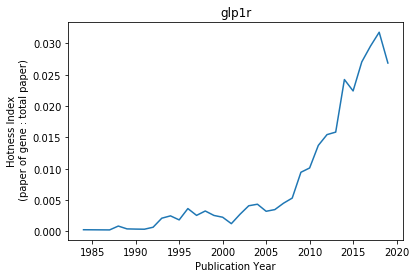

In [170]:
plot_gene_trend('glp1r')